<div class="alert alert-success"> 
        <h1 align="center" style="color:red;">Diabetes Health Indicators
</h1>  
     
</div>

# Importing Data and Libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [524]:
data1 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
data2 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
data3 = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# EDA

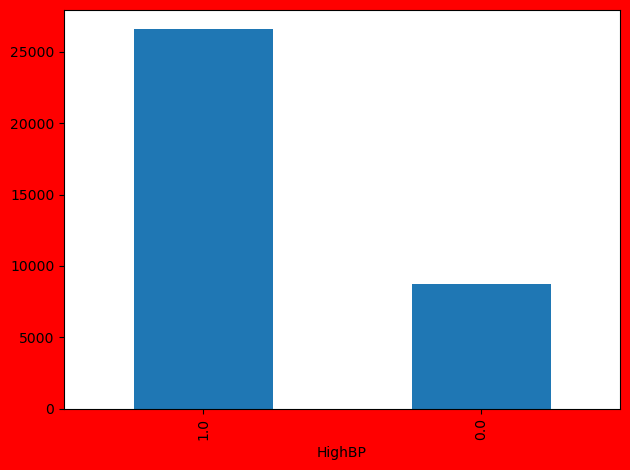

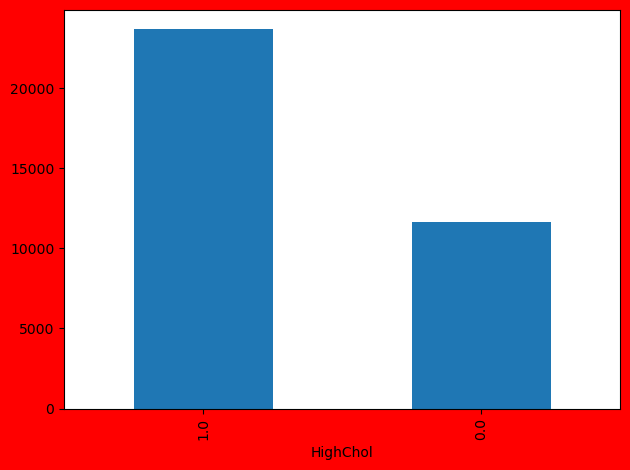

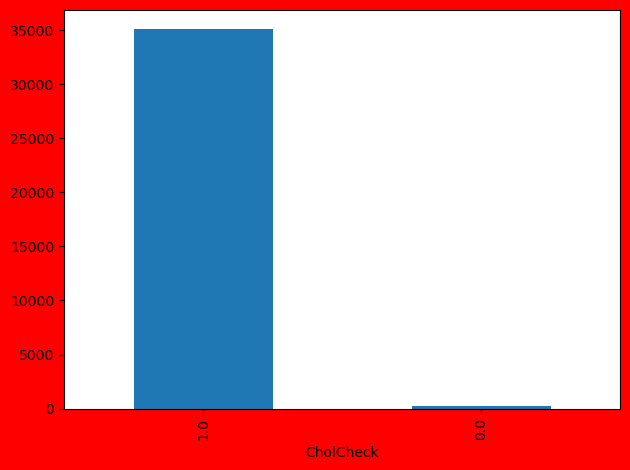

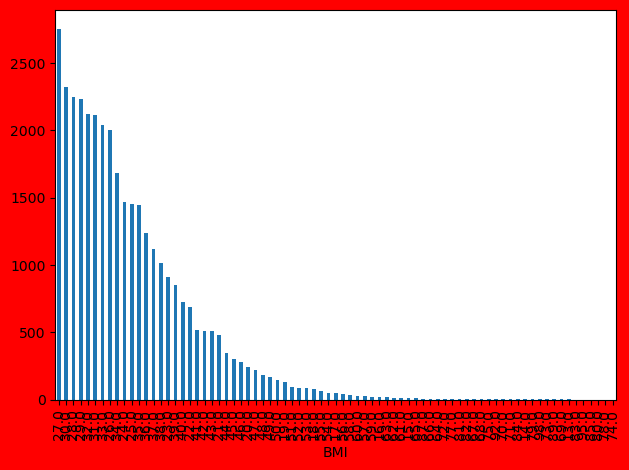

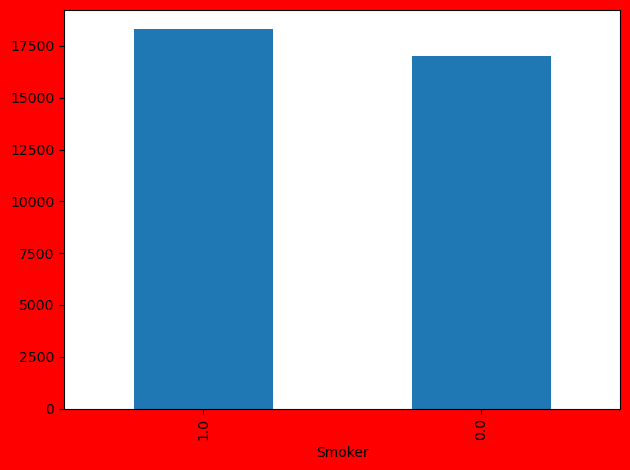

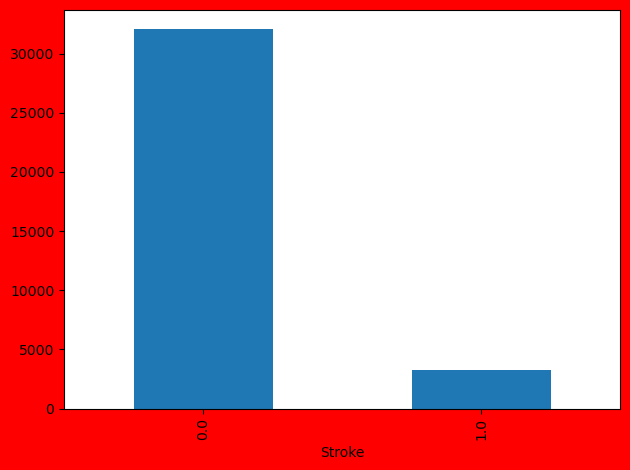

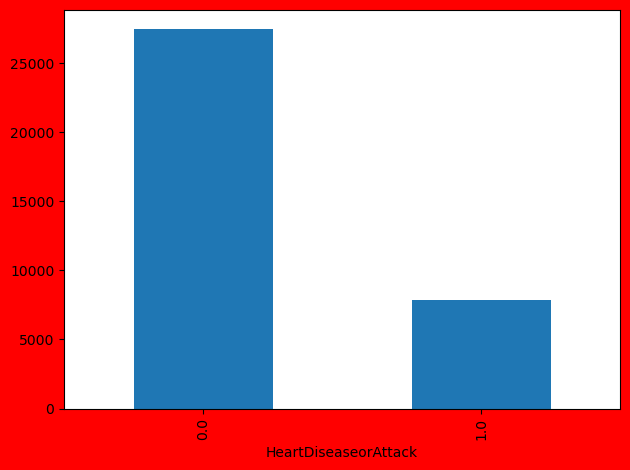

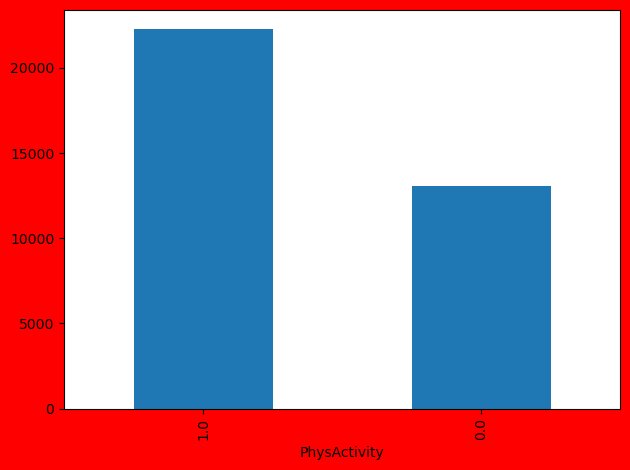

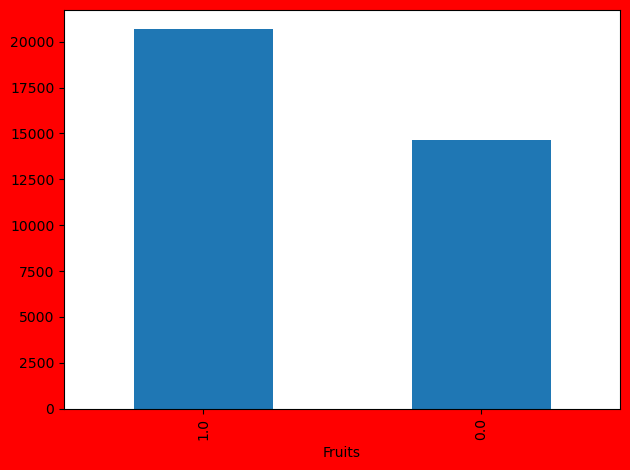

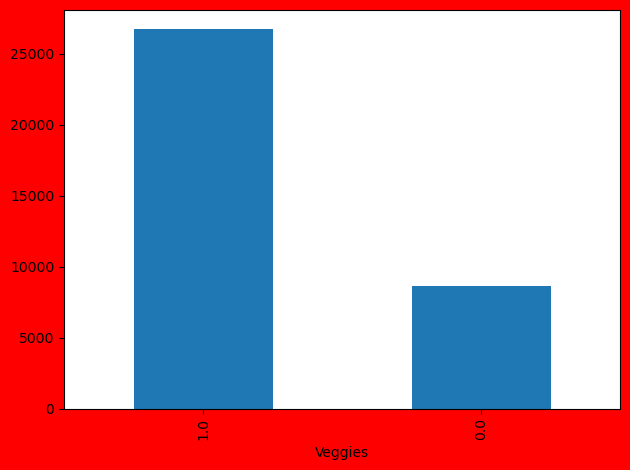

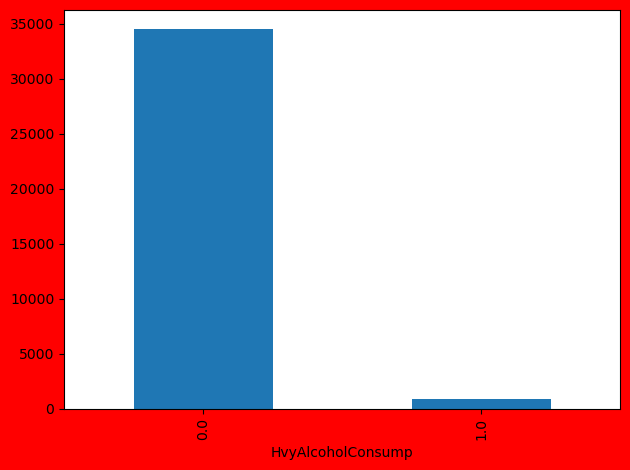

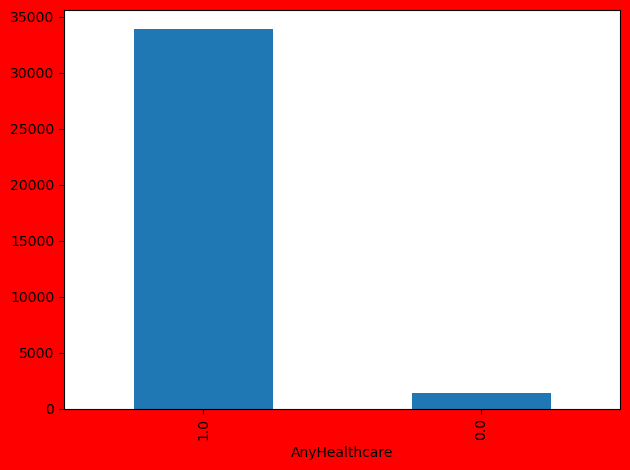

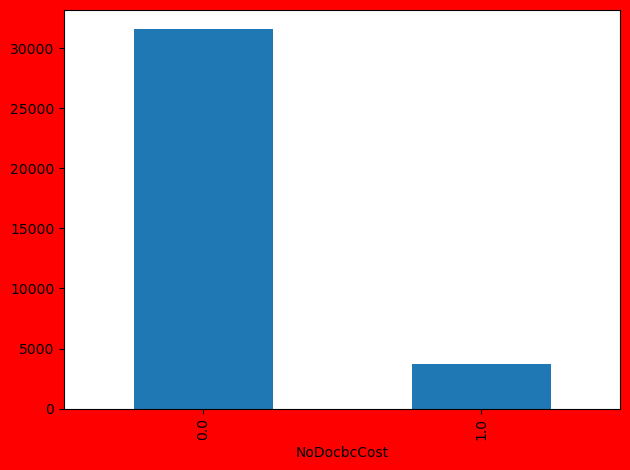

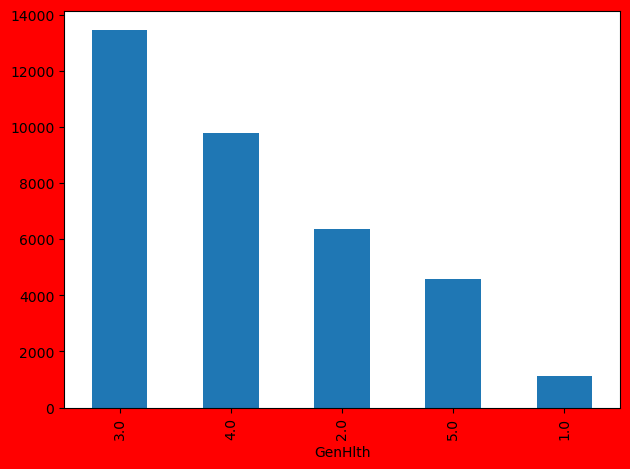

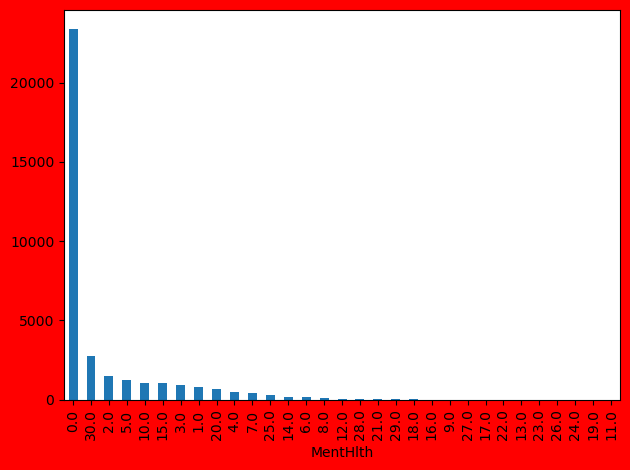

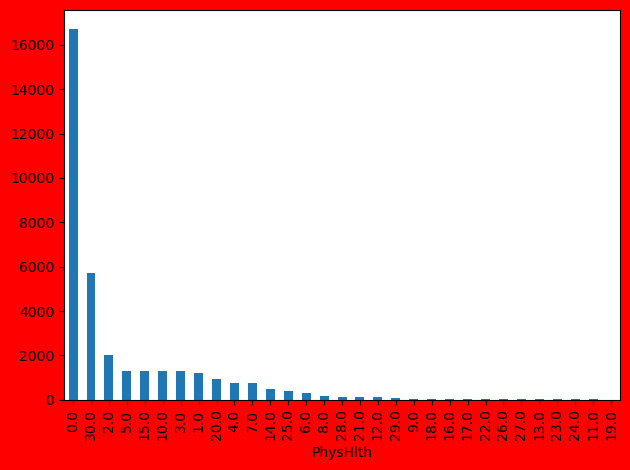

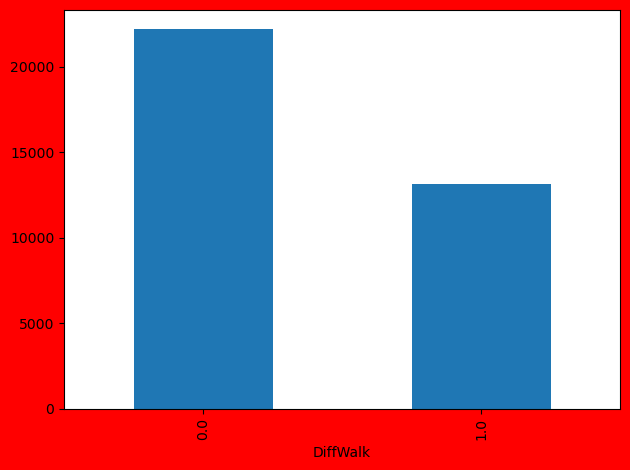

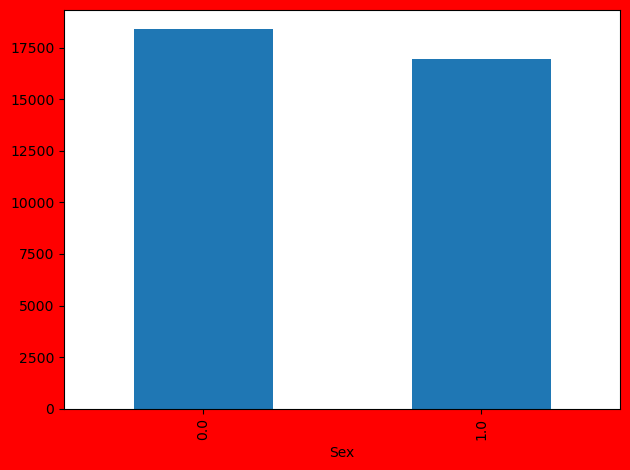

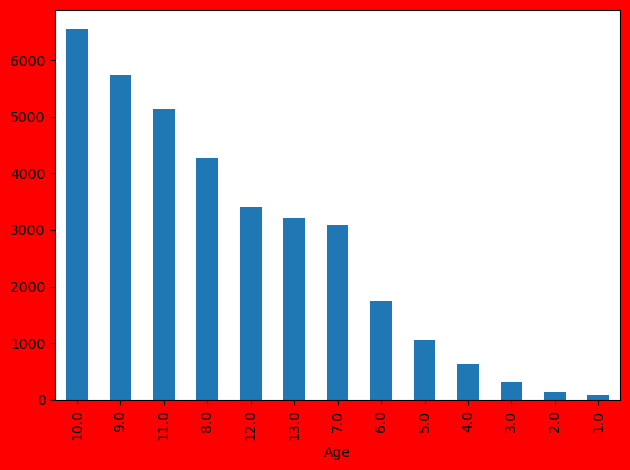

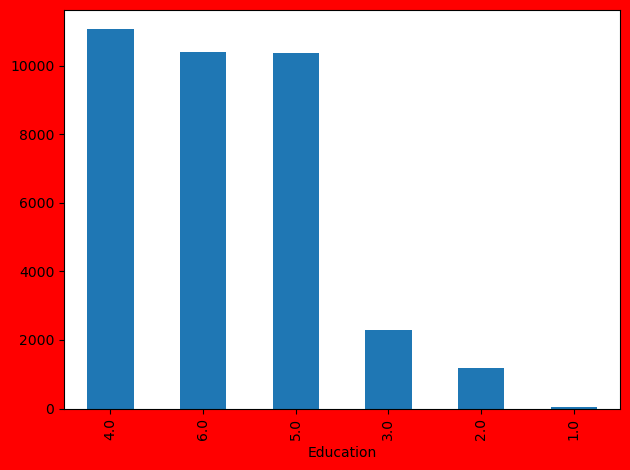

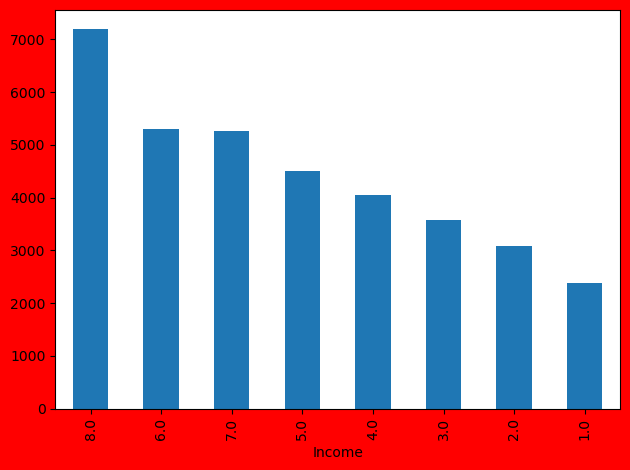

In [516]:
for feature in data1.columns.drop(['Diabetes_012']):
    data1[data1['Diabetes_012'] == 2][feature].value_counts().plot(kind='bar')
    plt.gcf().set_facecolor('red')
    plt.tight_layout()
    plt.show()

In [535]:
#sub_set = data1.groupby('HighBP')[data1['Diabetes_012'] == 2].value_counts()
#data1

data1[data1['Diabetes_012'] == 2].groupby('HighBP')['Diabetes_012'].value_counts().reset_index()

,HighBP,Diabetes_012,count
0,0.0,2.0,8742
1,1.0,2.0,26604


# Model1: Data1(ImBalanced): LogisticRegression

In [264]:
data1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [265]:
data1['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [266]:
X = data1.drop('Diabetes_012', axis=1).values
y = data1['Diabetes_012'].values

# Spliting data to test and train set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.90, random_state=0)

In [267]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import metrics

#model = RandomForestClassifier(n_estimators=150,max_depth=5,criterion="gini",bootstrap=True)
#model.fit(X_train,y_train)
#test_predictions1 = model.predict(X_test)
#print(metrics.classification_report(y_test,test_predictions1))

In [268]:
# Define the model
model1 = LogisticRegression(penalty='l2', C=10, random_state=0)

model1.fit(X_train,y_train)


C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, random_state=0)

In [269]:
#R square for LogisticRegression
model1.score(X_train,y_train)

0.8432539682539683

In [270]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model1.predict(X_test)))
print(metrics.confusion_matrix(y_test, model1.predict(X_test)))
print(metrics.classification_report(y_test, model1.predict(X_test)))

0.8438584042888678
[[20842     0   512]
 [  390     0    42]
 [ 3017     0   565]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     21354
         1.0       0.00      0.00      0.00       432
         2.0       0.50      0.16      0.24      3582

    accuracy                           0.84     25368
   macro avg       0.45      0.38      0.38     25368
weighted avg       0.79      0.84      0.80     25368



C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


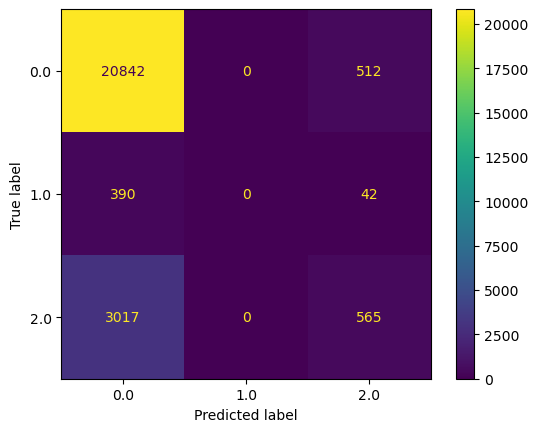

In [271]:
# Visializing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model1.predict(X_test), labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)

disp.plot()
plt.show()

# Model2: Data1(ImBalanced): RandomForestClassifier

### Using Stratified KFold to sample label of class equally:

In [282]:
X = data1.drop('Diabetes_012', axis=1).values
y = data1['Diabetes_012'].values

In [283]:
# Spliting data to test and train set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.90, random_state=0)

In [285]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

model2 = RandomForestClassifier(n_estimators=150,max_depth=5,criterion="gini",bootstrap=True)
model2.fit(X_train,y_train)

sk_folds = StratifiedKFold(n_splits=3)

scores = cross_val_score(model2, X, y, cv=sk_folds)

In [286]:
scores.mean()

0.8438702302112898

In [287]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model2.predict(X_test)))
print(metrics.confusion_matrix(y_test, model2.predict(X_test)))
print(metrics.classification_report(y_test, model2.predict(X_test)))

0.8435430463576159
[[21323     0    31]
 [  429     0     3]
 [ 3506     0    76]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     21354
         1.0       0.00      0.00      0.00       432
         2.0       0.69      0.02      0.04      3582

    accuracy                           0.84     25368
   macro avg       0.51      0.34      0.32     25368
weighted avg       0.81      0.84      0.78     25368



C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


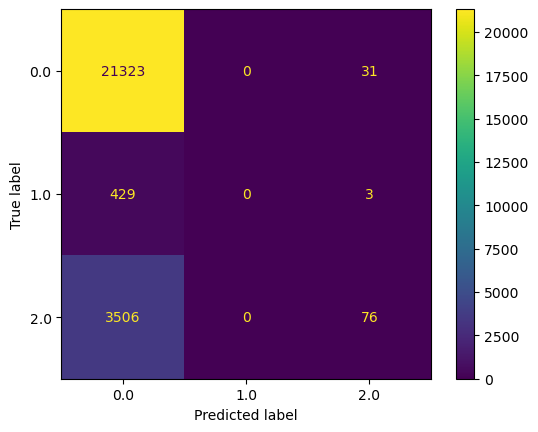

In [288]:
# Visializing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model2.predict(X_test), labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model2.classes_)

disp.plot()
plt.show()

# Model3: Data2(Balanced): RandomForestClassifier

In [248]:
data2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [249]:
X = data2.drop('Diabetes_binary', axis=1).values
y = data2['Diabetes_binary'].values

# Spliting data to test and train set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.90, random_state=0)

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model3 = RandomForestClassifier(n_estimators=150,max_depth=5,criterion="gini",bootstrap=True)
model3.fit(X_train,y_train)
predictions = model1.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     21354
         1.0       0.00      0.00      0.00       432
         2.0       0.50      0.16      0.24      3582

    accuracy                           0.84     25368
   macro avg       0.45      0.38      0.38     25368
weighted avg       0.79      0.84      0.80     25368



C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [290]:
#R square for LogisticRegression
model3.score(X_train,y_train)

0.8441518623637829

In [291]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model3.predict(X_test)))
print(metrics.confusion_matrix(y_test, model3.predict(X_test)))
print(metrics.classification_report(y_test, model3.predict(X_test)))

0.8435036266162094
[[21317     0    37]
 [  429     0     3]
 [ 3501     0    81]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     21354
         1.0       0.00      0.00      0.00       432
         2.0       0.67      0.02      0.04      3582

    accuracy                           0.84     25368
   macro avg       0.50      0.34      0.32     25368
weighted avg       0.81      0.84      0.78     25368



C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


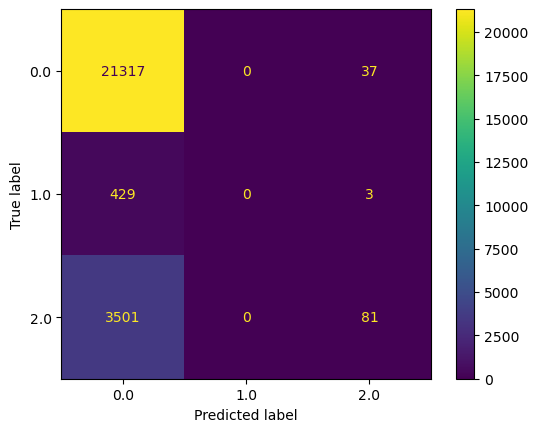

In [292]:
# Visializing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model3.predict(X_test), labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model3.classes_)

disp.plot()
plt.show()

# Model4: Data3(Imbalanced): RandomForestClassifier

### Using Stratified KFold to sample label of class equally

In [294]:
data3

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [296]:
X = data1.drop('Diabetes_012', axis=1).values
y = data1['Diabetes_012'].values

In [297]:
# Spliting data to test and train set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.90, random_state=0)

In [298]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

model4 = RandomForestClassifier(n_estimators=150,max_depth=5,criterion="gini",bootstrap=True)
model4.fit(X_train,y_train)

sk_folds = StratifiedKFold(n_splits=3)

scores = cross_val_score(model4, X, y, cv=sk_folds)

In [299]:
scores.mean()

0.8439766635130873

In [300]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model4.predict(X_test)))
print(metrics.confusion_matrix(y_test, model4.predict(X_test)))
print(metrics.classification_report(y_test, model4.predict(X_test)))

0.8435430463576159
[[21329     0    25]
 [  429     0     3]
 [ 3512     0    70]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     21354
         1.0       0.00      0.00      0.00       432
         2.0       0.71      0.02      0.04      3582

    accuracy                           0.84     25368
   macro avg       0.52      0.34      0.32     25368
weighted avg       0.81      0.84      0.78     25368



C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


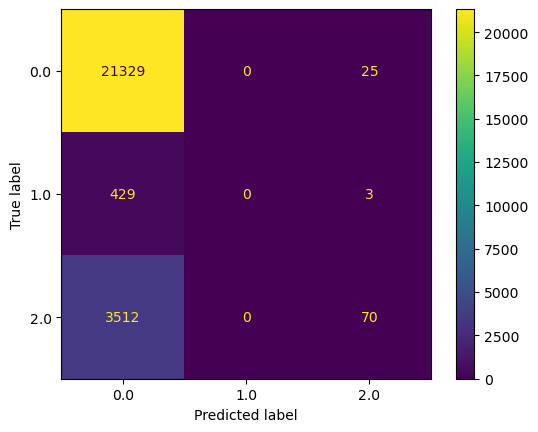

In [301]:
# Visializing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model4.predict(X_test), labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model4.classes_)

disp.plot()
plt.show()

# Model5: Data4(Imbalanced): RandomForestClassifier
### Concatinating data3, data2 and data1 on data3 to improve numbers of samples of Diabetic patentients and then stratify

In [359]:
# Rename data1 'Diabetes_012' column for easier concatination

data1.rename(columns={'Diabetes_012':'Diabetes_binary'}, inplace=True)
data1.set_axis(data2.columns, axis=1)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [367]:
data1a = data1[data1['Diabetes_binary']==2]
#['Diabetes_binary'].astype('str').str.replace('2', '1')

data1a['Diabetes_binary'] = (data1a['Diabetes_binary'] == 2).astype('int')

# Concatinating the 3 datasets 
data4 = pd.concat([data1a[data1a['Diabetes_binary']==1],
                  data2[data2['Diabetes_binary']==1],
                  data3[data3['Diabetes_binary']==0], 
                  data3[data3['Diabetes_binary']==1]],
                 axis=0)

data4

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_15884\2613155083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1a['Diabetes_binary'] = (data1a['Diabetes_binary'] == 2).astype('int')


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,1.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,1.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,1.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [368]:
data4['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    218334
1.0    106038
Name: count, dtype: int64

### Using Stratified KFold to sample label of class equally

In [370]:
X = data4.drop('Diabetes_binary', axis=1).values
y = data4['Diabetes_binary'].values

In [371]:
# Spliting data to test and train set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.90, random_state=0)

In [372]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

model5 = RandomForestClassifier(n_estimators=150,max_depth=5,criterion="gini",bootstrap=True)
model5.fit(X_train,y_train)

sk_folds = StratifiedKFold(n_splits=3)

scores = cross_val_score(model5, X, y, cv=sk_folds)

In [373]:
scores.mean()

0.754235877326033

In [374]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model5.predict(X_test)))
print(metrics.confusion_matrix(y_test, model5.predict(X_test)))
print(metrics.classification_report(y_test, model5.predict(X_test)))

0.7549479006103952
[[19534  2263]
 [ 5686  4955]]
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83     21797
         1.0       0.69      0.47      0.55     10641

    accuracy                           0.75     32438
   macro avg       0.73      0.68      0.69     32438
weighted avg       0.75      0.75      0.74     32438



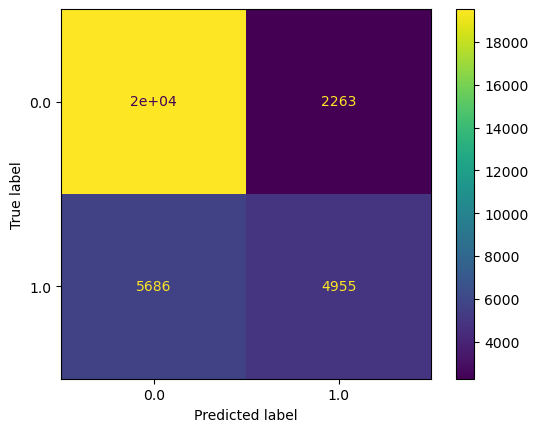

In [375]:
# Visializing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model5.predict(X_test), labels=model5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model5.classes_)

disp.plot()
plt.show()

# Model6: Data5(Imbalanced): RandomForestClassifier
### Concatinating data3, data2 and data1 on data1 to improve numbers of samples of Diabetic patentients and then stratify

In [382]:
data1a = data1[data1['Diabetes_binary']==2]
#['Diabetes_binary'].astype('str').str.replace('2', '1')

data1a['Diabetes_binary'] = (data1a['Diabetes_binary'] == 2).astype('int')

# Concatinating the 3 datasets 
data5 = pd.concat([data1[data1['Diabetes_binary']==0],
                   data1a[data1a['Diabetes_binary']==1],
                  data2[data2['Diabetes_binary']==1], 
                  data3[data3['Diabetes_binary']==1]],
                 axis=0)

data5

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_15884\1194486402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1a['Diabetes_binary'] = (data1a['Diabetes_binary'] == 2).astype('int')


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [383]:
data5['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    213703
1.0    106038
Name: count, dtype: int64

### Using Stratified KFold to sample label of class equally

In [384]:
X = data5.drop('Diabetes_binary', axis=1).values
y = data5['Diabetes_binary'].values

In [385]:
# Spliting data to test and train set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.90, random_state=0)

In [386]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

model6 = RandomForestClassifier(n_estimators=150,max_depth=5,criterion="gini",bootstrap=True)
model6.fit(X_train,y_train)

sk_folds = StratifiedKFold(n_splits=3)

scores = cross_val_score(model6, X, y, cv=sk_folds)

In [387]:
scores.mean()

0.7577101475157515

In [388]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model6.predict(X_test)))
print(metrics.confusion_matrix(y_test, model6.predict(X_test)))
print(metrics.classification_report(y_test, model6.predict(X_test)))

0.760906958561376
[[19075  2349]
 [ 5296  5255]]
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83     21424
         1.0       0.69      0.50      0.58     10551

    accuracy                           0.76     31975
   macro avg       0.74      0.69      0.71     31975
weighted avg       0.75      0.76      0.75     31975



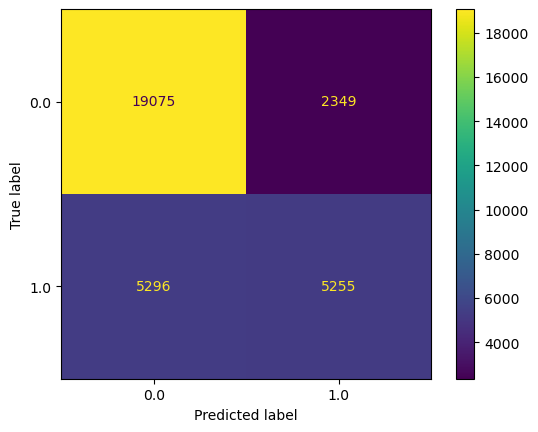

In [389]:
# Visializing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model6.predict(X_test), labels=model6.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model6.classes_)

disp.plot()
plt.show()

# Model7: Data6(Imbalanced): RandomForestClassifier
### Concatinating data3, data2 and data1 on data1 to improve numbers of samples of Non and Diabetic patients and then stratify

In [392]:
data1a = data1[data1['Diabetes_binary']==2]
#['Diabetes_binary'].astype('str').str.replace('2', '1')

data1a['Diabetes_binary'] = (data1a['Diabetes_binary'] == 2).astype('int')

# Concatinating the 3 datasets 
data6 = pd.concat([data1[data1['Diabetes_binary']==0], data1a[data1a['Diabetes_binary']==1],
                   data2[data2['Diabetes_binary']==0], data2[data2['Diabetes_binary']==1],
                   data3[data3['Diabetes_binary']==0], data3[data3['Diabetes_binary']==1]],
                 axis=0)

data6

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_15884\1659136572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1a['Diabetes_binary'] = (data1a['Diabetes_binary'] == 2).astype('int')


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [394]:
data6['Diabetes_binary'].value_counts(normalize=True)

Diabetes_binary
0.0    0.815078
1.0    0.184922
Name: proportion, dtype: float64

In [395]:
X = data6.drop('Diabetes_binary', axis=1).values
y = data6['Diabetes_binary'].values

# Spliting data to test and train set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.90, random_state=0)

### LogisticRegression without stratifying

In [396]:
# Define the model
model7 = LogisticRegression(penalty='l2', C=10, random_state=0)

model7.fit(X_train,y_train)

C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, random_state=0)

In [397]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model7.predict(X_test)))
print(metrics.confusion_matrix(y_test, model7.predict(X_test)))
print(metrics.classification_report(y_test, model7.predict(X_test)))

0.822053258462236
[[44388  2141]
 [ 8063  2751]]
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     46529
         1.0       0.56      0.25      0.35     10814

    accuracy                           0.82     57343
   macro avg       0.70      0.60      0.62     57343
weighted avg       0.79      0.82      0.79     57343



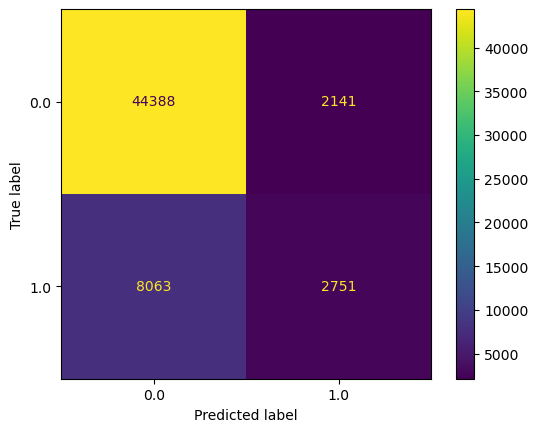

In [398]:
# Visializing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model7.predict(X_test), labels=model7.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model7.classes_)

disp.plot()
plt.show()

### StratifiedKFold with RandomForestClassifier

In [399]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

model7a = RandomForestClassifier(n_estimators=150,max_depth=5,criterion="gini",bootstrap=True)
model7a.fit(X_train,y_train)

sk_folds = StratifiedKFold(n_splits=3)

scores = cross_val_score(model7a, X, y, cv=sk_folds)

In [400]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model7a.predict(X_test)))
print(metrics.confusion_matrix(y_test, model7a.predict(X_test)))
print(metrics.classification_report(y_test, model7a.predict(X_test)))

0.8207627783687634
[[46113   416]
 [ 9862   952]]
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90     46529
         1.0       0.70      0.09      0.16     10814

    accuracy                           0.82     57343
   macro avg       0.76      0.54      0.53     57343
weighted avg       0.80      0.82      0.76     57343



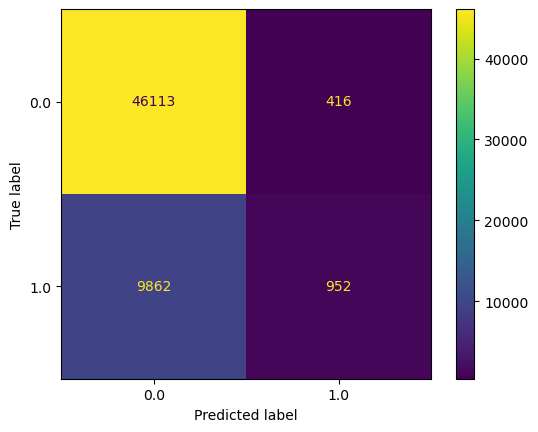

In [401]:
# Visializing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model7a.predict(X_test), labels=model7a.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model7a.classes_)

disp.plot()
plt.show()

# Variable Inflation Factor

In [411]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(data1)
series = pd.Series([variance_inflation_factor(x.values, i)
          for i in range(x.shape[1])],
#         index=x.columns
                  )

In [428]:
vif_df = pd.DataFrame({'features':x.columns, 'vif':series})
#df.reset_index()
vif_df

,features,vif
0,const,116.902353
1,Diabetes_binary,1.208661
2,HighBP,1.345328
3,HighChol,1.182057
4,CholCheck,1.033609
5,BMI,1.162228
6,Smoker,1.091884
7,Stroke,1.081559
8,HeartDiseaseorAttack,1.175660
9,PhysActivity,1.157397


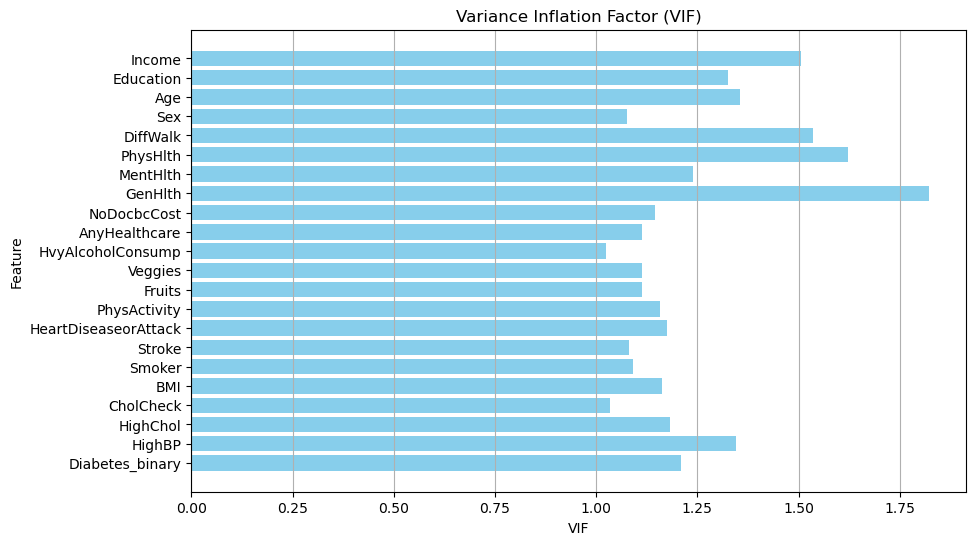

In [429]:

vif_df = vif_df[vif_df['features'] != 'const']
plt.figure(figsize=(10, 6))
plt.barh(vif_df['features'], vif_df['vif'], color='skyblue')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.title('Variance Inflation Factor (VIF)')
plt.grid(axis='x')
plt.show()

In [402]:
data1

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [405]:
data1['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64